# Assignment 5 - Introduction to deep learning in PyTorch

## *Derrick Nemetchek*

*Names of students you worked with on this assignment*: LIST HERE IF APPLICABLE (delete if not)

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

**Introduction.**  In this exercise we will work with the MNIST dataset, which consists of images containing one of possibly ten digits, ranging from zero to nine.  MNIST was once widely-used to benchmark image recognition models, and is still occasionally used in contemporary research to test exploratory ideas.  It is useful for testing such ideas because it is a relatively small dataset, so that prototyping can be done (computationally) very quickly. Your goal will be to solve the MNIST problem (i.e., classify these images as accurately as possible) using custom-built deep learning models.  

The problems here will be similar to the PyTorch 60-minute Blitz, except that the dataset we will use is different (i.e., MNIST instead of PASCAL VOC) and I will ask you to build some custom networks that are somewhat different than the ones discussed in the PyTorch Blitz.  To test your understanding, I will ask you to fill in key missing components of code I have provided, or write code from scratch.  During this assignment we will also demonstrate the advantages of some important deep learning building blocks. 

This assignment is designed so that you should be able to fill in the missing code if you (i) fully understand the 60-minute blitz, and (ii) spend a little time carefully considering the questions (and perhaps employ a little trial and error as well).  When I say "fully understand the blitz", I mean that you not only copied the code and ran it without error, but that you understand well what the code in the blitz is doing!  The 60-minute blitz may sometimes be entirely clear, and therefore it is reasonable if you find yourself sometimes reading about neural network structures and pytorch outside of the 60-minute blitz (e.g., The PyTorch website has myriad examples and great tutorials). 

**Instructions.** This assignment will be worth 100 points.  As usual, please submit your code and its output as a pdf file, generated from a Jupyter notebook.  I recommend you complete this assignment entirely in Google CoLab [(link)](https://colab.research.google.com/). The assignment will be divided into "Problems", which will be indicated below along with the number of points awarded for completion.  We will begin the assignment by importing important libraries. 

In [3]:
# You will need the following libraries to complete the assignment
import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np

import torch.optim as optim


ModuleNotFoundError: No module named 'torch'

**Problem #1 (5 points)**: First we need to properly load the MNIST dataset, along with built-in PyTorch data loaders.  Please fill in the proper code for the 'transform' object at the top, given the unique characteristics of the MNIST data.  

General Note: If you are working on a new problem, you will need to adjust your data to suit an existing data loader, or construct your own.  

In [12]:
#Fill in the details for the "transform" variable
transform = ToTensor()####################
### FILL THIS IN ###
#####################
      

# We will use a relatively large batch size of 128 here to 
#  accelerate the training process
batch_size = 128

# Download the MNIST dataset and data loaders
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Label the classes
classes = ('zero', 'one', 'two', 'three',
           'four', 'five', 'six', 'seven', 'eight', 'nine')

**Problem 2 (5 points)**:  Write code that will plot twenty MNIST images: two examples from each of the ten classes for the problem.   For full credit, all the images should be plotted within the same figure.

In [37]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

[2 2 2 2 2 2 2 2 2 2]


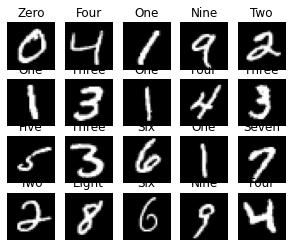

In [39]:
import matplotlib.pyplot as plt

labels_map = {
    0: "Zero",
    1: "One",
    2: "Two",
    3: "Three",
    4: "Four",
    5: "Five",
    6: "Six",
    7: "Seven",
    8: "Eight",
    9: "Nine",
}
counter = np.full(len(labels_map), 2)
print(counter)
figure = plt.figure(figsize=(5, 4))
cols, rows = 5, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    sample_idx = i
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()





**Problem 3 (40 POINTS)**.  In this problem we will start by creating the most naive architecture to solve an image recognition problem, in which we use only traditional fully-connected layers.  We will progressively move towards a more modern approach and witness the tremendous improvements in performance that result. 

**Part (a)**. Create an fully-connected neural network with 8 total layers of parameters.  Aside from the output layer, each layer should have 50 hidden units.  Use ReLU activations.  We will call this network *NetFC*.  

In [ ]:

class NetFc(nn.Module):
    def __init__(self):
      super().__init__()
  
      ####################
      ### FILL THIS IN ###
      ####################
          
    def forward(self, x):
   
      ####################
      ### FILL THIS IN ###
      ####################

      #Softmax layer should always be last
      output = F.log_softmax(x, dim=1)
      
      # Return the output of the network
      return output

**Part (b)**. In this part you will create a function that trains your model for two epochs (i.e., two complete passes over the training data), and prints the loss of your model on each 100th minibatch. 

In [ ]:
# This function takes in a pytorch model as 'net', and then trains it for two 
#  epochs (i.e., two loops over teh entire dataset).  You may want to adjust
# the learning rate sometimes and we will pass that in as 'lr'.  You will
# also need to pass in the 'trainloader' object to handle your data.  
# Your function should return the trained model. 
def trainMyModel(net,lr,trainloader):

  #Attempt to put your neural network onto the GPU. Do not worry if there is no 
  # GPU available on CoLab; for models of our size it won't be prohibitively 
  # slow and you can proceed with a CPU
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  net.to(device)

      ####################
      ### FILL THIS IN ###
      ####################


  # Don't forget, your function must print out the training loss on each 
  # 100th mini-batch

  print('Finished Training')
  return net



**Part (c)**. In this part you will create a function that will take a trained model as input, and a data loader (for your test data), and return the accuracy of the model on the testing data.  The accuracy should be reported to at least two decimal places. This function need not be general, but it should work with the 'testloader' that was created above for the MNIST dataset.  

In [ ]:
# This function takes in a pytorch model as 'trainedNet', and then applied it 
# to testing data that can be loaded using the 'testloader' object.  The
# function returns the accuracy of trainedNet on the whole testing dataset
# and prints the model's accuracy to the terminal (to at least two decimal 
#  places of accuracy)
def testMyModel(trainedNet,testloader):

      ####################
      ### FILL THIS IN ###
      ####################


  print(f'Accuracy of the network on the 10000 test images: {acc} %')
  return acc

Now train and test your *NetFC* model using a few different learning rates.  Find a learning rate that seems reasonable (hint: try values between 10^(-4) and 10^(-1)).  If your model is properly set up, you should obtain at least 75% accuracy.  

In [ ]:
# Train your model. 
net = NetFc();
lr = 0.001;
trainedNet = trainMyModel(net,lr,trainloader);

# Test your model
testMyModel(trainedNet,testloader)

**Problem 4 (10 POINTS)**.  Now we will see the advantages of skip connections in a deep neural network.  Below, fill in the template to create another fully connected neural network, called *NetFcRes* that has two skip connections in it: one connecting the output of the 1st network layer with the output of the 3rd network layer; and one skip connecting that connects the output of the 5th layer with the output of the 7th layer.  Then use your training and testing functions to train and evaluate the performance of your *NetFcRes* model.  

Adding skip connections results in so-called "residual networks", which are now widely-used in research and practice. If you are not sure how to proceed, please see the lecture slides introducing deep neural networks, or search for "residual layer" or "skip connection" on google; there are substantial resources explaining this structure.  If you understand residual connections, then you will only need to make some relatively minor modifications to *NetFc* to obtain your new *NetFcRes* model.

If done correctly, you should obtain at least 85% accuracy on the testing set after training two epochs, a substantial improvement over *NetFc*, the generic fully-connected network. 

In [ ]:
class NetFcRes(nn.Module):
    def __init__(self):
      super().__init__()
  
      ####################
      ### FILL THIS IN ###
      ####################
          
    def forward(self, x):
   
      ####################
      ### FILL THIS IN ###
      ####################
      
      #Softmax layer should always be last
      output = F.log_softmax(x, dim=1)
      
      # Return the output of the network
      return output

In [ ]:
# Train your model. 
net = NetFcRes();
lr = 0.001;
trainedNet = trainMyModel(net,lr,trainloader);

# Test your model
testMyModel(trainedNet,testloader)

**Problem 5 (20 POINTS)**.  Now we will see the advantages of convolutional structures in a deep neural network.  Below, fill in the template to create convolutional neural network, called 'NetCnn' that has the following structure: 

layer1: 8 3x3 convolutional filters, one pixel of zero-padding, and stride of one

layer2: 16 3x3 convolutional filters, one pixel of zero-padding, and stride of one

layer3: 2x2 max pooling, with stride of 2. No zero-padding. 

layer4: 32 3x3 convolutional filters, one pixel of zero-padding, and stride of one

layer5: 64 3x3 convolutional filters, one pixel of zero-padding, and stride of one

layer6: 2x2 max pooling, with stride of 2. No zero-padding. 

layer7: a fully connected layer of 50 neurons. 

Layer8: a fully connected layer of 10 neurons. 

If done correctly, you should obtain at least 95% accuracy on the testing set after training two epochs, a substantial improvement over *NetFcRes*, the fully-connected network with skip connections.  We could add skip connections to 'NetCnn' as well, which would further improve its performance, but this is a little tricky, and it will not be part of this assignment. 

In [ ]:
# Convolutional model - adding in convolutional layers

class NetCnn(nn.Module):
    def __init__(self):
      super().__init__()
      
        ####################
        ### FILL THIS IN ###
        ####################

        
    def forward(self, x):
   
        ####################
        ### FILL THIS IN ###
        ####################

      #Softmax layer should always be last
      output = F.log_softmax(x, dim=1)

      #Return output of model 
      return output


In [ ]:
# Train your model. 
net = NetCnn();
lr = 0.001;
trainedNet = trainMyModel(net,lr,trainloader);

# Test your model
testMyModel(trainedNet,testloader)

**Problem 6 (10 POINTS)**  In this last problem, you will add batch normalization layers to your network.  Batch normalization, and its variants (e.g., "layer norm") are another structure that is now widely-used in modern deep neural networks.  In this problem you will design a neural network called *NetCnnBn* with the exact same structure as 'NetCnn' except you will add two batch normalization layers in the following locations: (i) after the 2nd convolutional layer, and (ii) after the 1st fully connected layer.  

If done properly, you should be now be able to achieve approximately 99% accuracy on the testing dataset after two epochs of training.  

In [ ]:
# Convolutional model - adding in batch norm

class NetCnnBn(nn.Module):
    def __init__(self):
      super().__init__()
      
        ####################
        ### FILL THIS IN ###
        ####################

        
    def forward(self, x):
   
        ####################
        ### FILL THIS IN ###
        ####################

      #Softmax layer should always be last
      output = F.log_softmax(x, dim=1)

      #Return output of model 
      return output


In [ ]:
# Train your model. 
net = NetCnnBn();
lr = 0.001;
trainedNet = trainMyModel(net,lr,trainloader);

# Test your model
testMyModel(trainedNet,testloader)